In [146]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg
import os


In [147]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def densify_data(df, num_points=200, extrapolate=True):
    # Sort by cell_length to ensure monotonicity
    df = df.sort_values('cell_length').reset_index(drop=True)

    x = df['cell_length'].values
    y = df['E-dispersion'].values

    # Define interpolation function
    kind = 'cubic' if len(df) >= 4 else 'linear'
    if extrapolate:
        f_interp = interp1d(x, y, kind=kind, fill_value='extrapolate')
    else:
        f_interp = interp1d(x, y, kind=kind)

    # Generate new x values for denser sampling
    x_dense = np.linspace(x.min() - 0.05, x.max() + 0.05, num_points)
    y_dense = f_interp(x_dense)

    df_dense = pd.DataFrame({'cell_length': x_dense, 'E-dispersion': y_dense})
    return df_dense

def local_min(df):
    df['dy'] = df['E-dispersion'].diff()
    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()
    local_min_indices = df.index[(df['sign_change'] > 0)]

    if len(local_min_indices) == 0:
        print('No local min found')
        return None
    return df.loc[local_min_indices, ['cell_length', 'E-dispersion']].reset_index(drop=True)

def local_max(df):
    df['dy'] = df['E-dispersion'].diff()
    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()
    local_max_indices = df.index[(df['sign_change'] < 0)]

    if len(local_max_indices) == 0:
        print('No local max found')
        return None
    return df.loc[local_max_indices, ['cell_length', 'E-dispersion']].reset_index(drop=True)

# Example usage:
# original_df = pd.read_csv("your_data.csv")
# densified_df = densify_data(original_df)
# mins = local_min(densified_df)
# maxs = local_max(densified_df)

# Optional: plot to verify
# plt.plot(densified_df['cell_length'], densified_df['E-dispersion'], label='Interpolated')
# plt.scatter(mins['cell_length'], mins['E-dispersion'], color='green', label='Minima')
# plt.scatter(maxs['cell_length'], maxs['E-dispersion'], color='r_]()


In [148]:
def finding_diff(df):
    abs_max = 0
    max_val = max(local_max(df)['E-dispersion'])
    min_val = min(local_min(df)['E-dispersion'])

    
    if np.isnan(abs_max):
        abs_max = 0
        
    # print('a',abs_max)
    # print('b',max_val)
    # print('c',min_val)

    if max_val is None or min_val is None:
        return 0

    # diff = (abs_max + max_val)/2 - min_val
    diff = 0-min_val

    return diff

In [149]:
li_d3s = os.listdir('../d3_mbd_features_data/d3')

In [150]:
delta_e = []
cnt = 0
for items in li_d3s:
    print(f"Processing {items}")
    cnt+=1
    #get the path of each folder
    path = '../d3_mbd_features_data/d3'
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    diff_energy = finding_diff(df)
    delta_e.append({f'{items.strip('.csv')}': diff_energy})

Processing Mn.csv
Reading ../d3_mbd_features_data/d3/Mn.csv
Processing Al.csv
Reading ../d3_mbd_features_data/d3/Al.csv
Processing LiSnS2.csv
Reading ../d3_mbd_features_data/d3/LiSnS2.csv
Processing CsCl.csv
Reading ../d3_mbd_features_data/d3/CsCl.csv
Processing Li.csv
Reading ../d3_mbd_features_data/d3/Li.csv
Processing Na.csv
Reading ../d3_mbd_features_data/d3/Na.csv
Processing C.csv
Reading ../d3_mbd_features_data/d3/C.csv
No local max found


TypeError: 'NoneType' object is not subscriptable

In [ ]:
delta_e

[{'Mn': 1.53863},
 {'Al': 0.53453},
 {'LiSnS2': 0.56525},
 {'CsCl': 0.37495},
 {'Li': 0.80435},
 {'Na': 0.73342},
 {'Cu': 1.62452},
 {'SnS2': 0.19947},
 {'BaCl2': 0.56305},
 {'Ca': 1.07361},
 {'NaH': 2.38713},
 {'LiF': 2.2905},
 {'KH': 2.0085},
 {'LiCoO2': 3.61935},
 {'ZnS': 1.19819},
 {'CuI': 0.12667},
 {'LiH': 2.62983},
 {'CoO2': 0.29704},
 {'RbH': 1.6504},
 {'Mg': 0.59208},
 {'Ni': 2.32928},
 {'LiCl': 1.225},
 {'CsH': 1.63052}]

In [ ]:
import csv
with open('without_ref.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Compound', 'Value'])

    for item in delta_e:
        for compound, value in item.items():
            writer.writerow([compound, value])

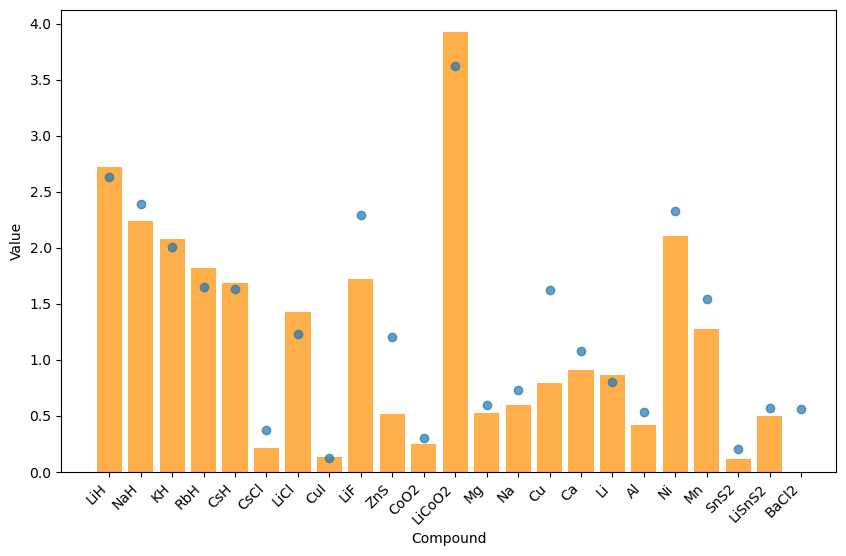

In [ ]:
import matplotlib.pyplot as plt

df1 = pd.read_csv('without_ref.csv')
df2 = pd.read_csv('with_ref.csv')

plt.figure(figsize=(10, 6))
# plt.plot(df1['Compound'], df1['Value'], label='Without Reference', alpha=0.7)
plt.bar(df2['Compound'], df2['Value'], label='With Reference', alpha=   0.7, color='darkorange')
plt.scatter(df1['Compound'], df1['Value'], label='Without Reference', alpha=0.7)

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Compound')
plt.ylabel('Value')
plt.show()
